Q1: What are the Probability Mass Function (PMF) and Probability Density Function (PDF)? Explain with
an example.

1. Probability Mass Function (PMF)

Used for discrete random variables (like rolling a dice, number of heads in coin tosses, etc.).

It gives the probability of each possible outcome.

Formula:

𝑃
(
𝑋
=
𝑥
)
=
𝑝
(
𝑥
)
P(X=x)=p(x)

where 
𝑝
(
𝑥
)
p(x) is the probability that the random variable 
𝑋
X takes the value 
𝑥
x.

The sum of all probabilities = 1.

Example (PMF):
If we roll a fair six-sided dice:

𝑃
(
𝑋
=
𝑥
)
=
1
6
,
𝑥
=
1
,
2
,
3
,
4
,
5
,
6
P(X=x)=
6
1
	​

,x=1,2,3,4,5,6
2. Probability Density Function (PDF)

Used for continuous random variables (like height, weight, exam scores, etc.).

It gives the relative likelihood of a value occurring.

Unlike PMF, the probability at an exact value is 0.

Instead, probability is defined over an interval:

𝑃
(
𝑎
≤
𝑋
≤
𝑏
)
=
∫
𝑎
𝑏
𝑓
(
𝑥
)
𝑑
𝑥
P(a≤X≤b)=∫
a
b
	​

f(x)dx

The area under the curve = 1.

Example (PDF):
For a standard normal distribution 
𝑁
(
0
,
1
)
N(0,1):

𝑓
(
𝑥
)
=
1
2
𝜋
𝑒
−
𝑥
2
2
f(x)=
2π
	​

1
	​

e
−
2
x
2
	​


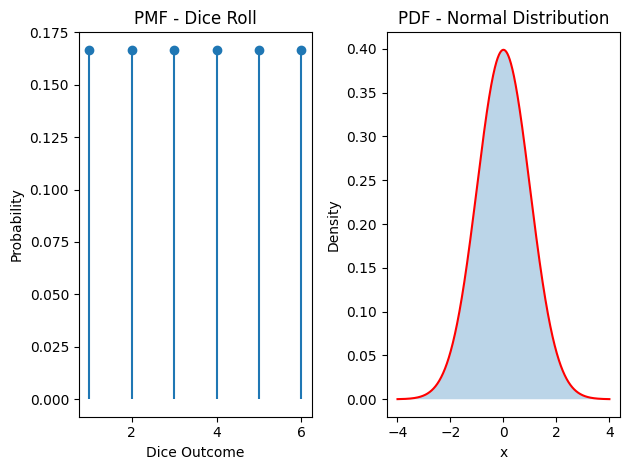

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ----- PMF Example (Dice Roll) -----
p = 1/6
x_pmf = np.arange(1, 7)
pmf_vals = [p] * 6   # each outcome has equal probability

plt.subplot(1, 2, 1)
plt.stem(x_pmf, pmf_vals, basefmt=" ")  # removed 'use_line_collection'
plt.title("PMF - Dice Roll")
plt.xlabel("Dice Outcome")
plt.ylabel("Probability")

# ----- PDF Example (Normal Distribution) -----
x_pdf = np.linspace(-4, 4, 1000)
pdf_vals = norm.pdf(x_pdf, 0, 1)  # mean=0, std=1

plt.subplot(1, 2, 2)
plt.plot(x_pdf, pdf_vals, 'r')
plt.fill_between(x_pdf, pdf_vals, alpha=0.3)
plt.title("PDF - Normal Distribution")
plt.xlabel("x")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


Q2: What is Cumulative Density Function (CDF)? Explain with an example. Why CDF is used?

1. Cumulative Distribution Function (CDF)

The Cumulative Distribution Function (CDF) of a random variable 
𝑋
X gives the probability that 
𝑋
X is less than or equal to some value 
𝑥
x.

𝐹
(
𝑥
)
=
𝑃
(
𝑋
≤
𝑥
)
F(x)=P(X≤x)

For discrete variables:

𝐹
(
𝑥
)
F(x) is the sum of probabilities from the smallest value up to 
𝑥
x.

For continuous variables:

𝐹
(
𝑥
)
F(x) is the integral of the PDF up to 
𝑥
x:

𝐹
(
𝑥
)
=
∫
−
∞
𝑥
𝑓
(
𝑡
)
 
𝑑
𝑡
F(x)=∫
−∞
x
	​

f(t)dt

The CDF always ranges between 0 and 1.

lim
⁡
𝑥
→
−
∞
𝐹
(
𝑥
)
=
0
,
lim
⁡
𝑥
→
+
∞
𝐹
(
𝑥
)
=
1
x→−∞
lim
	​

F(x)=0,
x→+∞
lim
	​

F(x)=1
2. Why do we use CDF?

It helps compute probabilities over intervals easily:

𝑃
(
𝑎
<
𝑋
≤
𝑏
)
=
𝐹
(
𝑏
)
−
𝐹
(
𝑎
)
P(a<X≤b)=F(b)−F(a)

Useful for both discrete and continuous variables.

Helps in quantile calculation (e.g., median, percentiles).

Provides a complete description of a random variable’s distribution.

3. Example
Discrete Example (Dice Roll):

Outcomes: 
1
,
2
,
3
,
4
,
5
,
6
1,2,3,4,5,6, each with probability 
1
/
6
1/6.

CDF at 
𝑥
=
3
x=3:

𝐹
(
3
)
=
𝑃
(
𝑋
≤
3
)
=
𝑃
(
1
)
+
𝑃
(
2
)
+
𝑃
(
3
)
=
3
6
=
0.5
F(3)=P(X≤3)=P(1)+P(2)+P(3)=
6
3
	​

=0.5

So, there is a 50% chance that the dice roll is ≤ 3.

Continuous Example (Normal Distribution):

For 
𝑋
∼
𝑁
(
0
,
1
)
X∼N(0,1), the PDF is bell-shaped.

The CDF at 
𝑥
=
0
x=0:

𝐹
(
0
)
=
𝑃
(
𝑋
≤
0
)
=
0.5
F(0)=P(X≤0)=0.5

(because normal distribution is symmetric around 0).

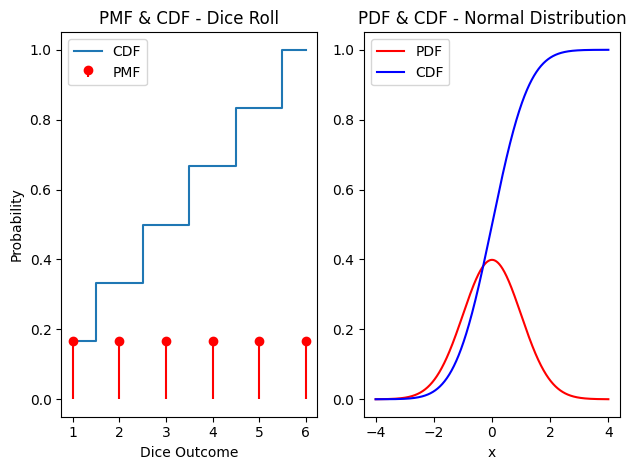

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

# ----- Discrete Example: Dice Roll -----
x = np.arange(1, 7)
pmf_vals = [1/6] * 6
cdf_vals = np.cumsum(pmf_vals)

plt.subplot(1, 2, 1)
plt.step(x, cdf_vals, where='mid', label="CDF")
plt.stem(x, pmf_vals, basefmt=" ", linefmt="r-", markerfmt="ro", label="PMF")
plt.title("PMF & CDF - Dice Roll")
plt.xlabel("Dice Outcome")
plt.ylabel("Probability")
plt.legend()

# ----- Continuous Example: Normal Distribution -----
x_cont = np.linspace(-4, 4, 1000)
pdf_vals = norm.pdf(x_cont, 0, 1)
cdf_vals = norm.cdf(x_cont, 0, 1)

plt.subplot(1, 2, 2)
plt.plot(x_cont, pdf_vals, 'r', label="PDF")
plt.plot(x_cont, cdf_vals, 'b', label="CDF")
plt.title("PDF & CDF - Normal Distribution")
plt.xlabel("x")
plt.legend()

plt.tight_layout()
plt.show()


Q3: What are some examples of situations where the normal distribution might be used as a model?
Explain how the parameters of the normal distribution relate to the shape of the distribution.

1. Situations Where Normal Distribution is Used

The normal distribution is one of the most widely used probability models because many real-world phenomena tend to follow it (thanks to the Central Limit Theorem).

Some common examples:

Human Heights & Weights

Heights of adult men/women in a population often follow a bell-shaped distribution.

Example: Mean male height ≈ 175 cm, standard deviation ≈ 7 cm.

Exam Scores

In large classes, test scores (after removing bias) often resemble a normal distribution around the average score.

Measurement Errors

Errors in scientific experiments and instruments often follow a normal distribution.

IQ Scores

IQ is designed to have a mean of 100 and standard deviation of 15 → approximately normal distribution.

Stock Market Returns (approximation)

Short-term stock returns sometimes approximate normal distribution (though with heavier tails in reality).

2. Parameters of Normal Distribution

A normal distribution is written as:

𝑋
∼
𝑁
(
𝜇
,
𝜎
2
)
X∼N(μ,σ
2
)

Mean (
𝜇
μ)

Determines the center of the curve (where the peak is located).

Shifting 
𝜇
μ moves the curve left or right.

Standard Deviation (
𝜎
σ)

Determines the spread (width) of the curve.

Larger 
𝜎
σ → flatter and wider curve.

Smaller 
𝜎
σ → taller and narrower curve.

Variance (
𝜎
2
σ
2
) is just the square of standard deviation.

✅ Properties:

Symmetric around the mean.

About 68% of values lie within 1σ, 95% within 2σ, 99.7% within 3σ (the 68-95-99.7 rule).

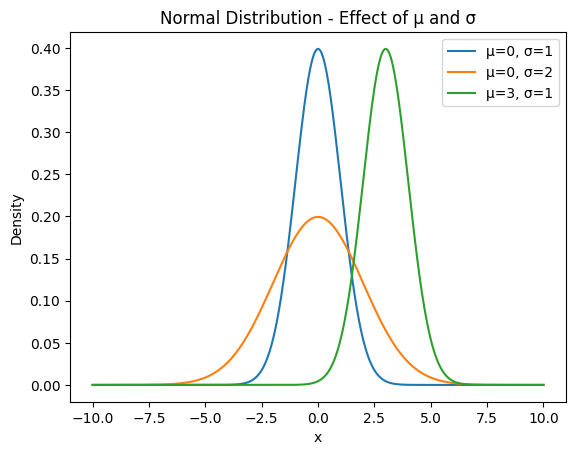

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-10, 10, 1000)

# Different normal distributions
pdf1 = norm.pdf(x, loc=0, scale=1)   # mean=0, std=1
pdf2 = norm.pdf(x, loc=0, scale=2)   # mean=0, std=2
pdf3 = norm.pdf(x, loc=3, scale=1)   # mean=3, std=1

plt.plot(x, pdf1, label="μ=0, σ=1")
plt.plot(x, pdf2, label="μ=0, σ=2")
plt.plot(x, pdf3, label="μ=3, σ=1")

plt.title("Normal Distribution - Effect of μ and σ")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()


Q4: Explain the importance of Normal Distribution. Give a few real-life examples of Normal
Distribution.

1. Importance of Normal Distribution

The Normal Distribution (bell curve) is one of the most important concepts in statistics and probability.

🔑 Why is it important?

Central Limit Theorem (CLT):

CLT states that the sampling distribution of the mean approaches a normal distribution as the sample size increases, regardless of the population distribution.

This makes the normal distribution a cornerstone for statistical inference.

Simplicity in Analysis:

Many statistical tests (t-test, z-test, regression, ANOVA) assume data is normally distributed.

Normality makes mathematical calculations easier and more reliable.

Error & Noise Modeling:

Measurement errors, experimental noise, and natural variations often follow normal distribution.

Probability Calculations:

Easy to calculate probabilities and percentiles using CDF.

Helps in decision-making, quality control, and risk assessment.

Basis for Machine Learning & AI:

Many algorithms assume normality (e.g., Naïve Bayes, Gaussian Mixture Models).

Used in feature scaling, anomaly detection, and generative models.

2. Real-Life Examples of Normal Distribution

Human Heights & Weights

Heights of adult men and women usually follow a normal distribution around the mean (e.g., men ~ 175 cm with std ~ 7 cm).

IQ Scores

IQ is designed to follow a normal distribution with mean = 100, standard deviation = 15.

Blood Pressure

Average blood pressure readings in a population follow a normal distribution.

Exam/Test Scores

In large groups, student test scores often approximate a normal distribution.

Measurement Errors in Science

When you repeatedly measure the same thing, small errors tend to follow a normal distribution.

Stock Returns (short term)

Daily returns in finance can be modeled approximately by a normal distribution (though real markets have heavier tails).

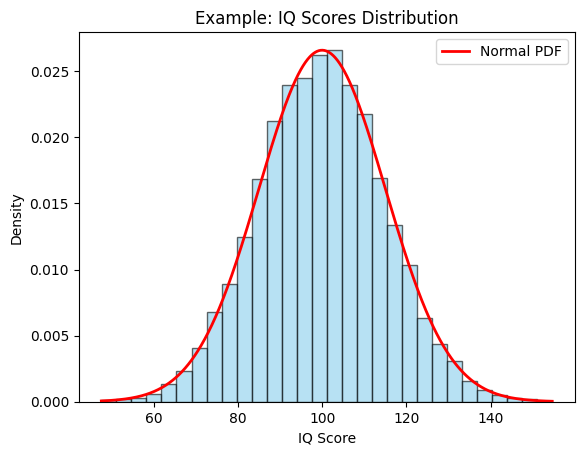

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate data (mean=100, std=15) e.g., IQ scores
mu, sigma = 100, 15
data = np.random.normal(mu, sigma, 10000)

# Plot histogram and theoretical PDF
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

x = np.linspace(min(data), max(data), 1000)
plt.plot(x, norm.pdf(x, mu, sigma), 'r', linewidth=2, label="Normal PDF")

plt.title("Example: IQ Scores Distribution")
plt.xlabel("IQ Score")
plt.ylabel("Density")
plt.legend()
plt.show()


Q5: What is Bernaulli Distribution? Give an Example. What is the difference between Bernoulli
Distribution and Binomial Distribution?

1. Bernoulli Distribution

A Bernoulli distribution is the probability distribution of a random variable that has exactly two possible outcomes:

Success (1) with probability 
𝑝
p

Failure (0) with probability 
1
−
𝑝
1−p

Mathematically:

𝑃
(
𝑋
=
𝑥
)
=
𝑝
𝑥
(
1
−
𝑝
)
1
−
𝑥
,
𝑥
∈
{
0
,
1
}
P(X=x)=p
x
(1−p)
1−x
,x∈{0,1}

Example: Tossing a coin

Success = Heads = 1

Failure = Tails = 0

If the coin is fair, 
𝑝
=
0.5
p=0.5.

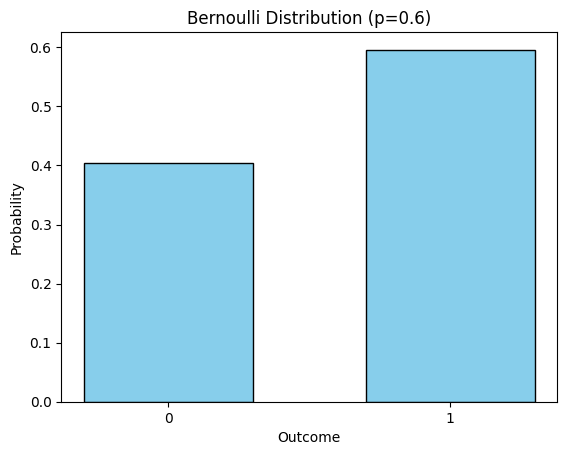

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Probability of success
p = 0.6  

# Generate data
data = bernoulli.rvs(p, size=1000)

# Plot
plt.hist(data, bins=[-0.5, 0.5, 1.5], density=True, rwidth=0.6, color="skyblue", edgecolor="black")
plt.xticks([0, 1])
plt.title("Bernoulli Distribution (p=0.6)")
plt.xlabel("Outcome")
plt.ylabel("Probability")
plt.show()


Q6. Consider a dataset with a mean of 50 and a standard deviation of 10. If we assume that the dataset
is normally distributed, what is the probability that a randomly selected observation will be greater
than 60? Use the appropriate formula and show your calculations.

P(X>60)=1−Φ(1)≈0.1586553, i.e. ≈ 15.87%.

Steps / formulas

Given 
𝜇
=
50
,
 
𝜎
=
10
μ=50, σ=10.

Compute the z-score for 
𝑥
=
60
x=60:

𝑧
=
𝑥
−
𝜇
𝜎
=
60
−
50
10
=
1
z=
σ
x−μ
	​

=
10
60−50
	​

=1

Probability 
𝑃
(
𝑋
>
60
)
=
1
−
𝑃
(
𝑋
≤
60
)
=
1
−
Φ
(
1
)
P(X>60)=1−P(X≤60)=1−Φ(1), where 
Φ
Φ is the standard normal CDF.

Using the standard normal table / formula:

Φ
(
1
)
≈
0.8413447460685429
Φ(1)≈0.8413447460685429

so

𝑃
(
𝑋
>
60
)
=
1
−
0.8413447460685429
≈
0.15865525393145707
 
(
≈
15.87
%
)
.
P(X>60)=1−0.8413447460685429≈0.15865525393145707 (≈15.87%).

In [7]:
from scipy.stats import norm
prob = norm.sf(60, loc=50, scale=10)   # survival function = 1 - cdf
print(prob)         # 0.15865525393145707
print(prob*100)     # 15.865525393145707 %


import math
z = (60 - 50) / 10
phi = 0.5 * (1 + math.erf(z / math.sqrt(2)))   # standard normal CDF
prob = 1 - phi
print(prob)    # 0.15865525393145707

0.15865525393145707
15.865525393145708
0.15865525393145719


Q7: Explain uniform Distribution with an example.

Uniform Distribution
1. Definition

A Uniform Distribution is a probability distribution where all outcomes are equally likely within a given interval.

There are two types:

Discrete Uniform Distribution: Finite set of equally likely outcomes (e.g., rolling a fair dice).

Continuous Uniform Distribution: Values are equally likely within a continuous range 
[
𝑎
,
𝑏
]
[a,b].

2. Continuous Uniform Distribution

If 
𝑋
∼
𝑈
(
𝑎
,
𝑏
)
X∼U(a,b), then:

PDF (Probability Density Function):

𝑓
(
𝑥
)
=
1
𝑏
−
𝑎
,
𝑎
≤
𝑥
≤
𝑏
f(x)=
b−a
1
	​

,a≤x≤b

CDF (Cumulative Distribution Function):

𝐹
(
𝑥
)
=
𝑥
−
𝑎
𝑏
−
𝑎
,
𝑎
≤
𝑥
≤
𝑏
F(x)=
b−a
x−a
	​

,a≤x≤b

Mean:

𝜇
=
𝑎
+
𝑏
2
μ=
2
a+b
	​


Variance:

𝜎
2
=
(
𝑏
−
𝑎
)
2
12
σ
2
=
12
(b−a)
2
	​

3. Real-Life Examples

Lottery numbers – Every number has equal chance of being selected.

Spinning a fair wheel of fortune – Equal probability for each section.

Random number generator – Produces values uniformly between 0 and 1.

Arrival time within a fixed interval – If a bus can arrive anytime between 10:00 and 10:30 uniformly.

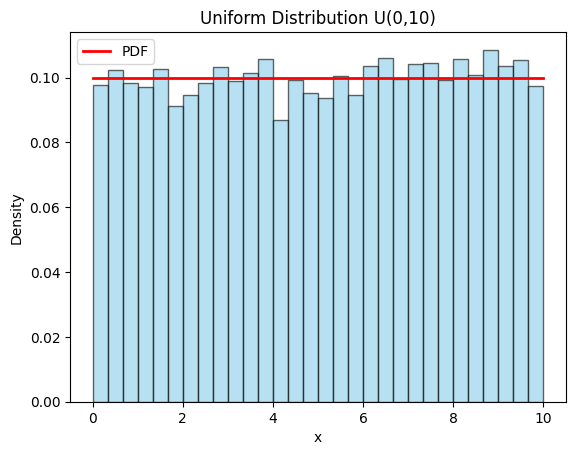

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Define parameters
a, b = 0, 10  # uniform distribution from 0 to 10

# Generate data
data = uniform.rvs(loc=a, scale=b-a, size=10000)

# Plot histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Theoretical PDF line
x = np.linspace(a, b, 1000)
pdf = uniform.pdf(x, loc=a, scale=b-a)
plt.plot(x, pdf, 'r', linewidth=2, label="PDF")

plt.title("Uniform Distribution U(0,10)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()


✅ In summary:

* Uniform distribution means all outcomes are equally probable.

* Used when we have no preference for one value over another within an interval.

Q8: What is the z score? State the importance of the z score.

A z-score (also called standard score) tells us how many standard deviations a data point is away from the mean of the distribution.

𝑧
=
𝑥
−
𝜇
𝜎
z=
σ
x−μ
	​


Where:

𝑥
x = observed value

𝜇
μ = mean

𝜎
σ = standard deviation

2. Interpretation

𝑧
=
0
z=0 → Value is exactly at the mean.

𝑧
=
+
1
z=+1 → Value is 1 standard deviation above the mean.

𝑧
=
−
2
z=−2 → Value is 2 standard deviations below the mean.

3. Importance of Z-Score

✅ Standardization

Z-scores convert values from different datasets into a common scale (mean = 0, std = 1).

Useful for comparing scores across different distributions.

✅ Probability & Normal Distribution

In a standard normal distribution, z-scores map directly to probabilities.

Example: 
𝑧
=
1.96
z=1.96 corresponds to the 95% confidence interval.

✅ Outlier Detection

If 
∣
𝑧
∣
>
3
∣z∣>3, the value is considered an outlier in most datasets.

✅ Statistical Tests

Many tests (z-test, t-test approximations) rely on z-scores.

✅ Machine Learning / Data Science

Feature scaling: StandardScaler in ML normalizes features using z-scores.

4. Example

Suppose exam scores are normally distributed:

Mean (
𝜇
μ) = 70

Standard deviation (
𝜎
σ) = 10

A student scores 
𝑥
=
85
x=85.

𝑧
=
85
−
70
10
=
15
10
=
1.5
z=
10
85−70
	​

=
10
15
	​

=1.5

👉 Interpretation: The student scored 1.5 standard deviations above the mean, which places them roughly in the 93rd percentile.

In [9]:
from scipy.stats import norm

mu, sigma = 70, 10
x = 85

# Calculate z-score
z = (x - mu) / sigma
print("Z-score:", z)

# Probability of scoring less than x
prob = norm.cdf(z)  
print("Percentile:", prob*100, "%")


Z-score: 1.5
Percentile: 93.3192798731142 %


✅ In summary:

* Z-score = (value – mean) ÷ std deviation

* It’s important for standardization, probability calculations, outlier detection, and hypothesis testing.

Q9: What is Central Limit Theorem? State the significance of the Central Limit Theorem.

1. Central Limit Theorem (CLT)

The Central Limit Theorem states:

👉 If we take sufficiently large random samples from any population with finite mean 
𝜇
μ and finite variance 
𝜎
2
σ
2
, the sampling distribution of the sample mean will approximately follow a normal distribution, regardless of the original population’s distribution.

Formally:

𝑋
ˉ
∼
𝑁
(
𝜇
,
𝜎
2
𝑛
)
as 
𝑛
→
∞
X
ˉ
∼N(μ,
n
σ
2
	​

)as n→∞

Where:

𝑋
ˉ
X
ˉ
 = sample mean

𝜇
μ = population mean

𝜎
2
σ
2
 = population variance

𝑛
n = sample size

2. Significance of the CLT

✅ Why is it important?

Normal Approximation

Even if the population is skewed or non-normal, the distribution of sample means tends toward normal as sample size increases.

Foundation for Hypothesis Testing

Z-tests, t-tests, confidence intervals all rely on CLT.

Practical Use

In real life, populations are rarely normal, but CLT allows us to still use normal-based statistical methods for inference.

Probability Calculations

Allows us to estimate probabilities for averages using the normal distribution.

Big Data & Sampling

Justifies why we can analyze a subset of data (sample) to make conclusions about the population.

3. Example

Suppose we roll a dice (population = {1,2,3,4,5,6}, uniform distribution).

Mean = 3.5, Variance = 2.92.

If we take sample means of many rolls (say n=30 each time), their distribution will look normal, even though a single dice roll is uniform.

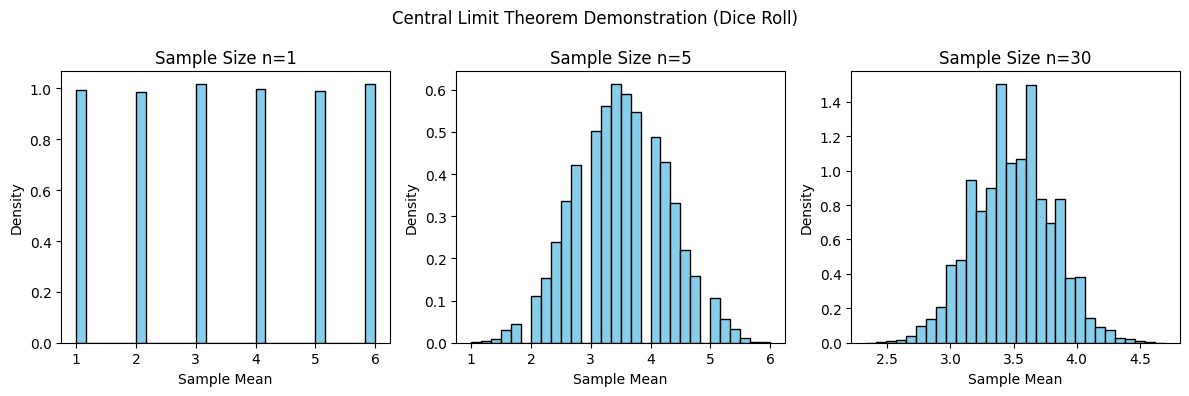

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Population: rolling a fair dice (1 to 6)
population = np.arange(1, 7)

# Function to generate sample means
def sample_means(n, num_samples=10000):
    means = [np.mean(np.random.choice(population, n)) for _ in range(num_samples)]
    return means

# Different sample sizes
sample_sizes = [1, 5, 30]
plt.figure(figsize=(12, 4))

for i, n in enumerate(sample_sizes, 1):
    means = sample_means(n)
    plt.subplot(1, 3, i)
    plt.hist(means, bins=30, density=True, color="skyblue", edgecolor="black")
    plt.title(f"Sample Size n={n}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")

plt.suptitle("Central Limit Theorem Demonstration (Dice Roll)")
plt.tight_layout()
plt.show()

Output Explanation

* n=1: Distribution looks uniform (same as dice).

* n=5: Distribution of means starts becoming bell-shaped.

* n=30: Distribution of means is very close to normal.

✅ Summary:
* The Central Limit Theorem is powerful because it:

* Explains why the normal distribution is so common in statistics.

* Justifies using normal-based inference methods even for non-normal data.

* Makes sampling and estimation possible in real life.

Q10: State the assumptions of the Central Limit Theorem.

Assumptions of the Central Limit Theorem (CLT)

For the CLT to hold true, the following assumptions must generally be satisfied:

1. Independent and Identically Distributed (i.i.d.) Samples

The samples must be independent (one sample does not influence another).

The samples should come from the same distribution (identical).

👉 Example: Rolling a fair die multiple times — each roll is independent and from the same uniform distribution.

2. Sample Size Should Be Large Enough

CLT works better with larger 
𝑛
n.

Rule of thumb:

𝑛
≥
30
n≥30 is often considered sufficient for many distributions.

If the population is highly skewed, an even larger 
𝑛
n may be required.

3. Finite Mean and Variance

The population must have a finite mean (
𝜇
μ) and finite variance (
𝜎
2
σ
2
).

If variance is infinite (e.g., Cauchy distribution), CLT does not apply.

4. Random Sampling

The data must be drawn randomly from the population.

Non-random or biased sampling can break CLT.

5. No Extreme Dependence

If observations are strongly dependent (like time series with autocorrelation), CLT may not apply unless special conditions are met.

✅ Summary Table
* Assumption	Why it matters
* Independence	Ensures unbiased sampling
* Identical Distribution	Keeps consistency across samples
* Large Sample Size	Allows the approximation to normal
* Finite Mean & Variance	Avoids undefined behavior
* Random Sampling	Prevents bias

📌 In short:
CLT requires random, independent samples with finite variance, and the sample size should be sufficiently large for the sampling distribution of the mean to approach normality.